In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
stations = pd.read_csv('./stations_with_cluster_4_without_pca.csv')

In [3]:
stations_1 = stations[stations['cluster_number'] == 0] # group1
stations_2 = stations[stations['cluster_number'] == 1] # group2
stations_3 = stations[stations['cluster_number'] == 3] # group3
stations_4 = stations[stations['cluster_number'] == 2] # group4



In [4]:
stations_4.sample(n=5)

station_cd  station_g_cd station_name  station_name_k  station_name_r  \
1421     9930126       9930126        国立競技場             NaN             NaN   
1339     2800616       2800115          永田町             NaN             NaN   
423      1132725       1132725           木下             NaN             NaN   
1246     2800209       1130101           東京             NaN             NaN   
694      1130228       1130228           田町             NaN             NaN   

      line_cd  pref_cd      post             address         lon  ...  \
1421    99301       13  160-0013         新宿区霞ケ丘町１０-３  139.714932  ...   
1339    28006       13  100-0014  東京都千代田区永田町一丁目11-28  139.740258  ...   
423     11327       12  270-1326               印西市木下  140.147954  ...   
1246    28002       13  100-0005       東京都千代田区丸の内一丁目  139.764708  ...   
694     11302       13  108-0014      東京都港区芝五丁目33-36  139.747575  ...   

      node_density_km intersection_density_km edge_density_km  \
1421       192.506359              170.620485    28703.713789   
1339       156.028105              151.479180    25925.208175   
423        139.576843              123.452443    31226.419649   
1246       165.298299              162.020429    24674.204414   
694        180.803562              169.581272    25717.281742   

      street_density_km  circuity_avg  self_loop_proportion  \
1421       17753.103908      1.044821              0.000000   
1339       18856.105160      1.039238              0.000000   
423        15870.337076      1.046269              0.001312   
1246       21055.849005      1.017915              0.001506   
694        18558.177237      1.039575              0.002193   

      clean_intersection_count  clean_intersection_density_km  \
1421                     237.0                     105.856165   
1339                     206.0                      93.707841   
423                      217.0                     109.343592   
1246                     189.0                      88.502489   
694                      264.0                     109.729059   

      station_name_roman  cluster_number  
1421                 NaN               2  
1339                 NaN               2  
423                  NaN               2  
1246                 NaN               2  
694                  NaN               2  

[5 rows x 37 columns]

In [5]:
import folium
from folium import plugins
# 貼り付ける画像
image = "https://i.pinimg.com/originals/93/98/01/93980185d68b64c792049ed75e395db0.png"
center_lat, center_lon = (35.651820534474,139.54461236426)

In [6]:
_map = folium.Map(location=[center_lat, center_lon], zoom_start=10, control_scale=True)

# 地図に画像を追加
plugins.FloatImage(
    image, 
    bottom=45, # 数値を上げると上がる  ベストは bottom=65
    left=42,  # 数値を上げると右に移動  ベストは left=82
).add_to(_map)

for _, station in stations_2.iterrows():
    color = 'red'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [7]:
_map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

for _, station in stations_3.iterrows():
    color = 'orange'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [8]:
_map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

for _, station in stations_1.iterrows():
    color = 'blue'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [9]:
_map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

for _, station in stations_4.iterrows():
    color = 'green'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [10]:
columns = ['station_cd', 'n', 'm', 'k_avg', 'intersection_count',
       'streets_per_node_avg', 'edge_length_total', 'edge_length_avg',
       'street_length_total', 'street_length_avg', 'street_segments_count',
       'node_density_km', 'intersection_density_km', 'edge_density_km',
       'street_density_km', 'circuity_avg', 'self_loop_proportion',
       'clean_intersection_count', 'clean_intersection_density_km', 'cluster_number']

clusters = stations[columns].groupby('cluster_number')

In [11]:
labels = {0: 'second dense area', 1: 'forth dense area', 2: 'third dense area', 3: 'first dense area'}

In [12]:
def hist_feature(feature_name):
    target_names = stations['cluster_number'].unique()
    plt.figure()

    # 最大値と最小値の間をn_bin等分した幅でヒストグラムの棒を表示するように設定（各targetのbin幅を統一する）
    n_bin = 15
    x_max = stations[feature_name].max()
    x_min = stations[feature_name].min()
    bins = np.linspace(x_min, x_max, n_bin)

    for target in target_names:
        plt.hist(stations[stations['cluster_number'] == target][feature_name], bins=bins, alpha=0.6, label=labels[target])

    plt.title(feature_name)
    plt.legend()
    plt.savefig(f"{feature_name}_hist.png", bbox_inches = "tight")

In [13]:
feature_columns = ['n', 'm', 'k_avg', 'intersection_count',
       'streets_per_node_avg', 'edge_length_total', 'edge_length_avg',
       'street_length_total', 'street_length_avg', 'street_segments_count',
       'node_density_km', 'intersection_density_km', 'edge_density_km',
       'street_density_km', 'circuity_avg', 'self_loop_proportion',
       'clean_intersection_count', 'clean_intersection_density_km']


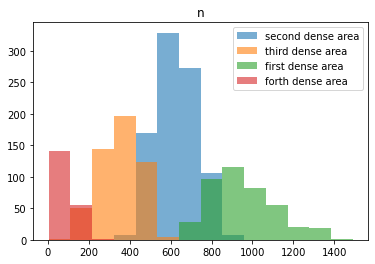

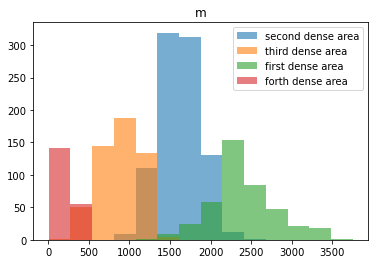

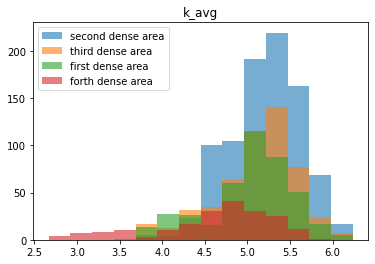

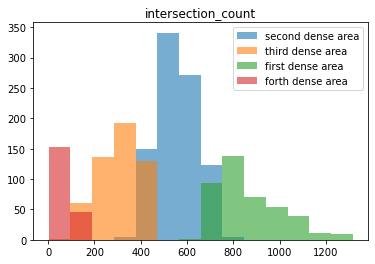

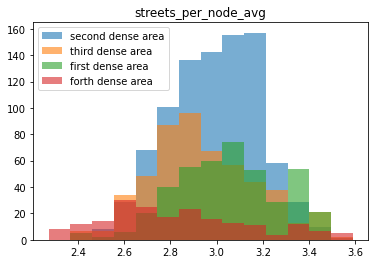

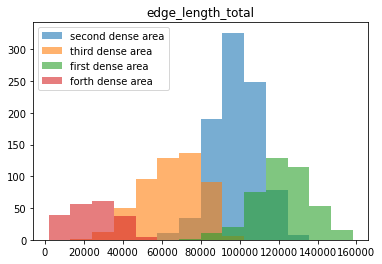

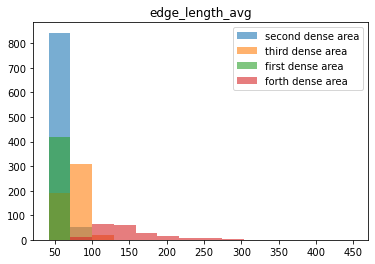

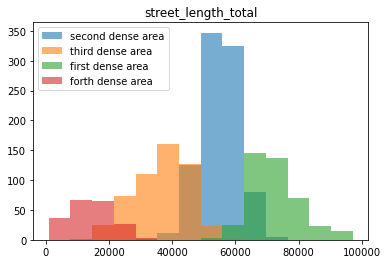

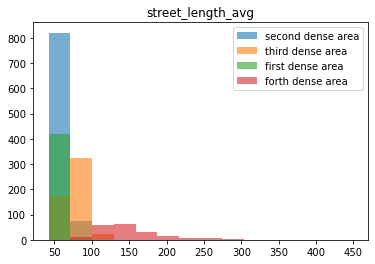

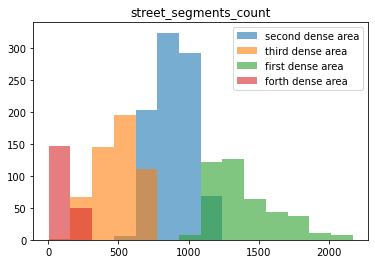

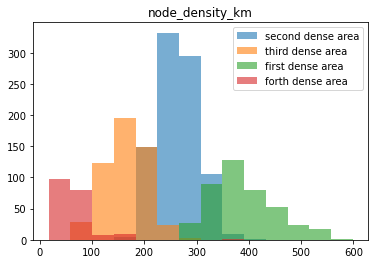

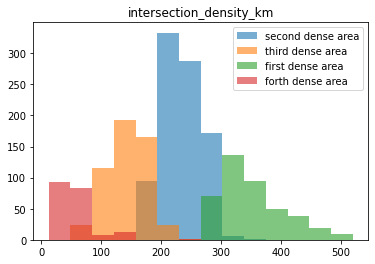

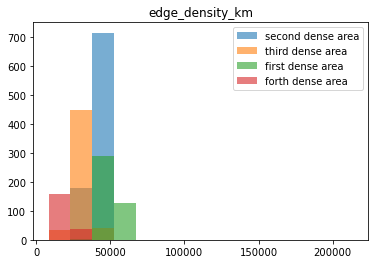

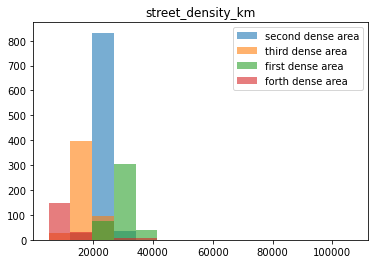

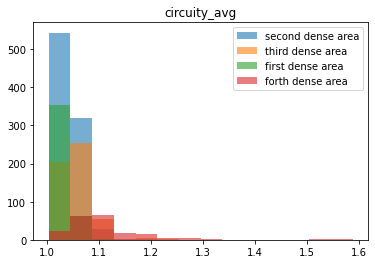

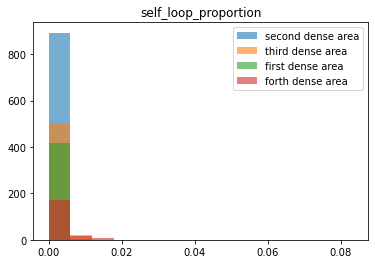

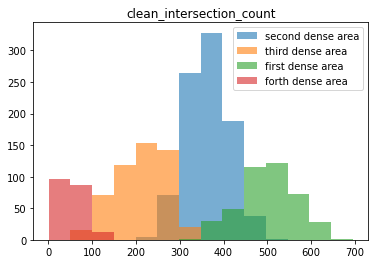

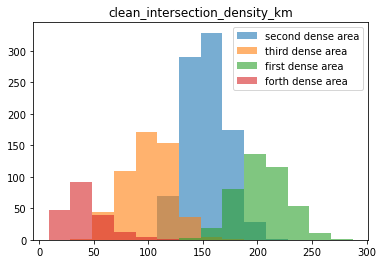

In [14]:
for feature in feature_columns:
    hist_feature(feature)

In [15]:
len(feature_columns)

18

In [16]:
import networkx as nx
import osmnx as ox
import requests
import sys,os,os.path
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
/opt/conda/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


'1.2.1'

In [17]:
geometry = tuple(stations_1.sample()[['lat', 'lon']].values.tolist()[0])
geometry

(35.330741, 139.407197)

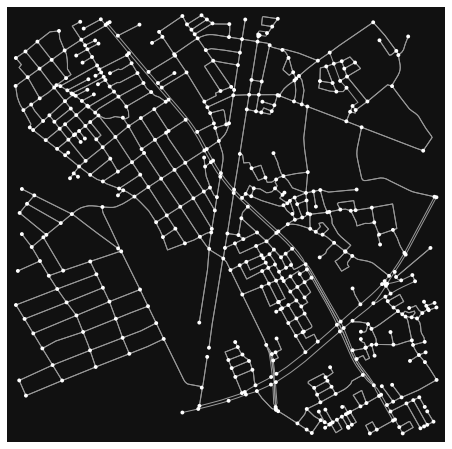

In [17]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_1.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

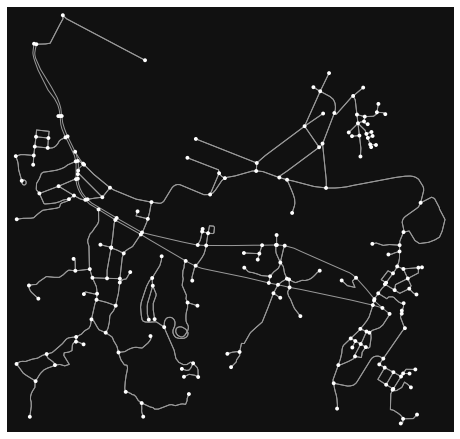

In [18]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_2.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

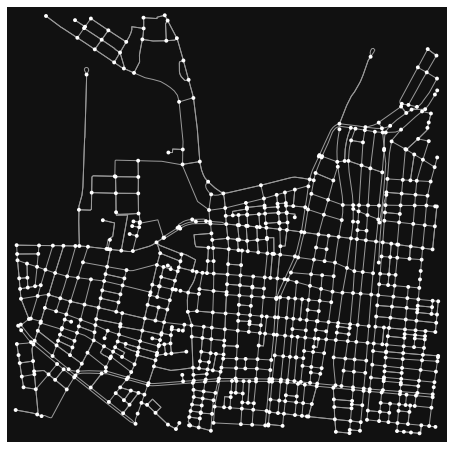

In [19]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_3.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

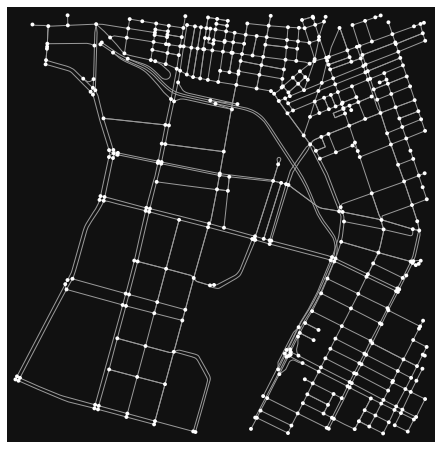

In [20]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_4.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

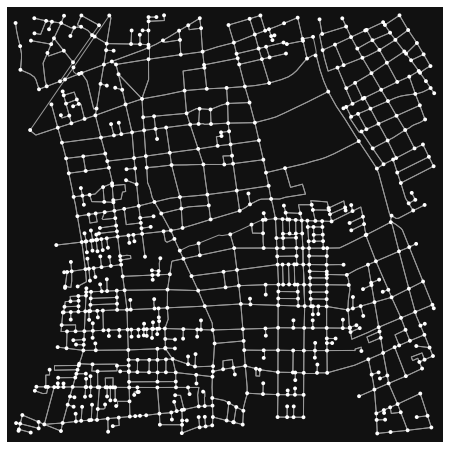

In [10]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_1.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

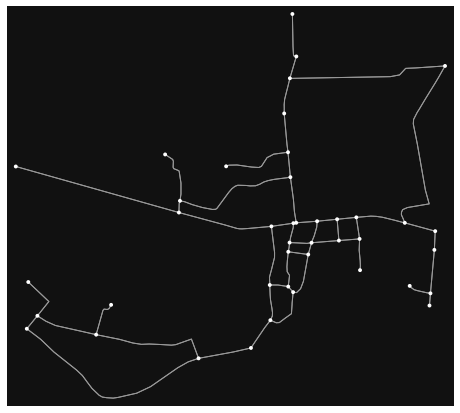

In [14]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_2.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

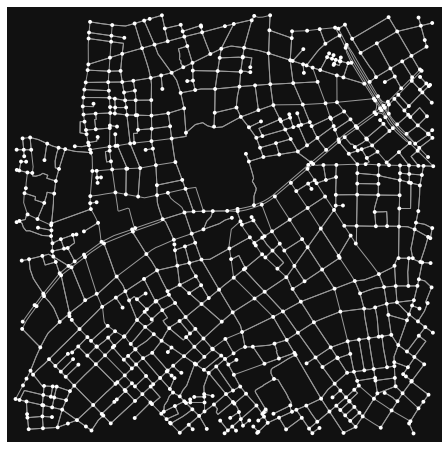

In [12]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_3.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

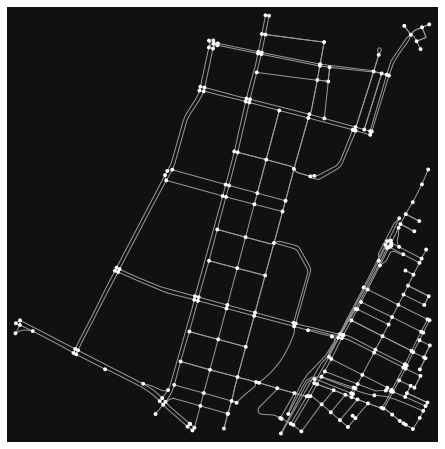

In [13]:
# inner_cityの800m範囲内を取得
geometry = tuple(stations_4.sample()[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)

480    京成八幡
Name: station_name, dtype: object


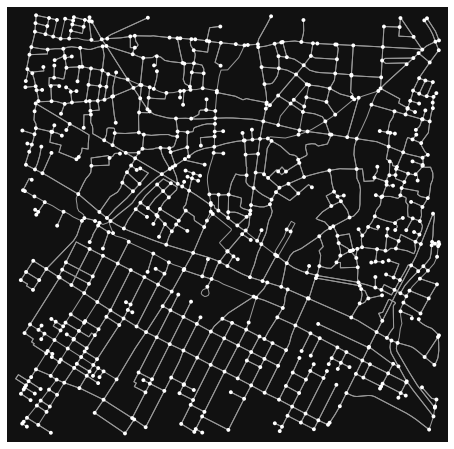

In [20]:
# inner_cityの800m範囲内を取得
station = stations_1.sample()
geometry = tuple(station[['lat', 'lon']].values.tolist()[0])
one_mile = 800 #meters
G = ox.graph_from_point(geometry, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G)